# 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA 및 전처리

## 결측치 확인 및 불필요한 변수 제거

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- 결측치 없음
- 범주형 변수 처리 필요
- 수치형 변수 분포 확인 필요

In [5]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- car_ID는 전체 데이터셋 갯수만큼 존재
- 학습에 필요없음을 가정

In [6]:
# 수치형 데이터만 포함한 데이터 프레임
numeric_df = df.select_dtypes(include=['number'])

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<Axes: >

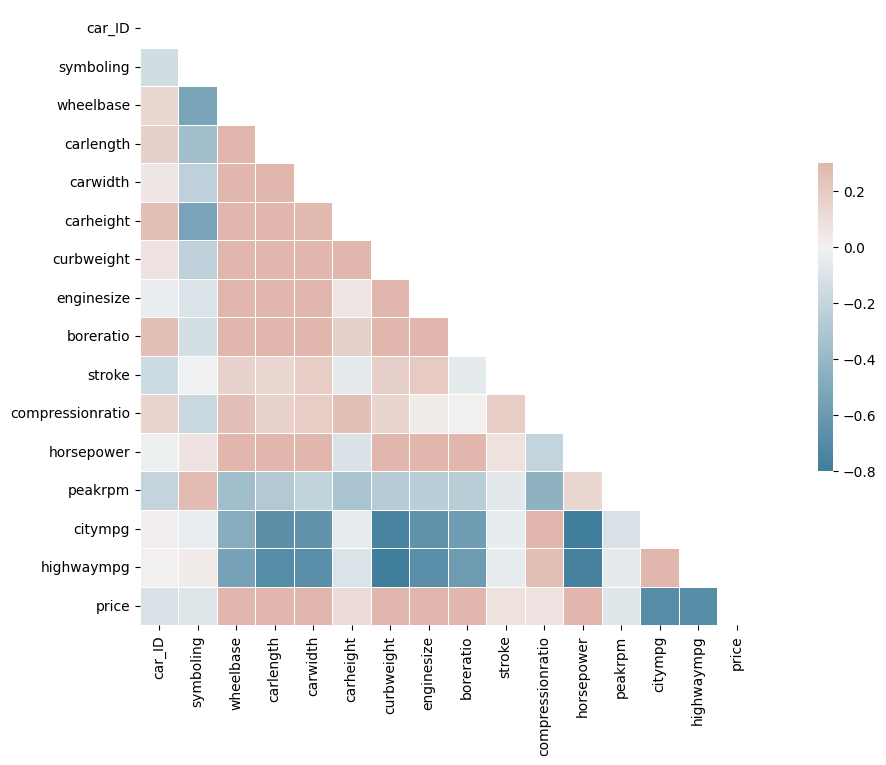

In [7]:
f, ax = plt.subplots(figsize=(16, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = numeric_df.corr()
print(corr['price'].sort_values(ascending=False))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- car_ID는 자동차에 대한 고유 ID이기 때문에 필요없음
- 상관계수가 낮은 symboling도 제거

# 범주형 변수 분석

In [30]:
# 범주형 데이터만 포함한 데이터 프레임
categorical_df = df.select_dtypes(exclude=['number'])

In [31]:
categorical_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [32]:
categorical_df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

### CarName 컬럼 분석

In [40]:
categorical_df['CarName'].nunique()

147

In [41]:
categorical_df[categorical_df['CarName'].str.contains('audi', case=False)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [42]:
categorical_df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [43]:
categorical_df[categorical_df['CarName'].str.contains('diesel', case=False)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi
114,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi
199,volvo diesel,gas,turbo,four,wagon,rwd,front,ohc,four,mpfi


- 잘보면, CarName에 디젤이지만 fueltype이 gas인 것도 있다.
- 디젤로 바꿔주자

In [44]:
categorical_df[categorical_df['CarName'].str.contains('diesel', case=False)]['fueltype'].apply(lambda x : 'diesel')

9      diesel
114    diesel
199    diesel
Name: fueltype, dtype: object

In [45]:
categorical_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


### fueltype

In [47]:
# 해당 변수는 간단하게 원핫 인코딩 처리해도 될 것
categorical_df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

### Doornumber

In [49]:
# 해당 변수는 수치형 변환 결정
categorical_df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

### carbody

In [50]:
categorical_df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

categorical_df